# Files and Directories

A file is a sequence of bytes, stored in some filesystem, and accessed by a file name.

A directory is a collection of files, and possibly other directories. The term folder is a synonym

## File Input and Output

The simplest kind of persistence is a plain old file, sometimes called a flat file. You read from a file into memory and write from memory to a file

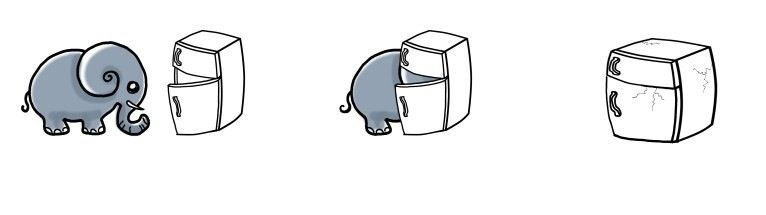

### Create or Open with open( )

You need to call the open function before you do the following
* Read an existing file
* Write to a new file
* Append to an existing file 
* Overwrite an existing file

* fileobj is the file object returned by open( )
* filename is the string name of the file
* mode is a string indicating the file's type and what you want to do with it
    - The first letter of mode indicates the operation 
        * r means read.
        * w means write. If the file doesn't exist, it's created. If the file does exist, it's over-written
        * x means write, but only if the files does not already exist.
        * a means append (write after the end) if the file exists
    - The second letter of mode is the file's type 
        * t (or nothing) means text.
        * b means binary

In [1]:
fout = open('oops.txt', 'wt')
fout.close()

### Write a Text File with print( )

Let's re-create oops.txt, but now write a line to it and then close it

In [2]:
fout = open('oops.txt', 'wt')
print('Oops, I created a file.', file=fout)
fout.close()

We used the file argument to print. Without it, print writes to standard output, which is your terminal ( unless you've told your shell program to reditect output to a file with > or piped it to another program with | )

### Write a Text File with write( )

The following code writes the entire poem to the file 'relativity' in one call

In [3]:
poem ='''There was a young lady named Bright,
Whose speed was far faster than light;
She started one day
In a relative way,
And returned on the previous night.'''

In [4]:
len(poem)

150

The write function returns the number of bytes written. It does not add any spaces or newlines.

In [5]:
fout = open('relativity1', 'wt')
fout.write(poem)

150

In [6]:
fout.close()

Should you use write or print? by default print adds a space after each argument and a newline at the end 

In [7]:
fout = open('relativity2', 'wt')
print(poem, file=fout)
fout.close()

To make print work like write, pass it the following two arguments
* sep (separator, which defauls to a space, ' ')
* end (end string, which defaults to a newline, '\n')

In [8]:
fout = open('relativity3', 'wt')
print(poem, file=fout, sep='', end='')
fout.close()

If you have a large source string, you can also write chunks (using slices) until the source is done. Slices allow you to 'go over the end' without raising an exception

In [9]:
fout = open('relativity', 'wt')
size= len(poem)
offset = 0 
chunk = 100
while True:
    if offset > size:
        break
    fout.write(poem[offset:offset+chunk]) # using slices 
    offset += chunk

In [10]:
fout.close()

Let's see whether using mode x really protects us from overwriting it

In [11]:
fout = open('relativity', 'xt')

FileExistsError: [Errno 17] File exists: 'relativity'

You can use this with an exception handler

In [12]:
try: 
    fout = open('relativity', 'xt')
    fout.write('Stomp stomp stomp')
except:
    print('relativity already exists!. That was a close one.')

relativity already exists!. That was a close one.


### Read a Text File with read( ), readline( ), or readlines( ) 

You can call read( ) with no arguments to slurp up the entire file at once 

In [13]:
fin = open('relativity', 'rt')
poem = fin.read()
fin.close()

In [14]:
poem

'There was a young lady named Bright,\nWhose speed was far faster than light;\nShe started one day\nIn a relative way,\nAnd returned on the previous night.'

You can provide a maximum character count to limit how much read( ) returns at one time. After you've read all the way to the end, further calls to read() will return an empty string (''), which is treated as False

In [15]:
poem = ''
fin = open('relativity', 'rt')
chunk = 100
while True:
    fragment = fin.read(chunk)
    if not fragment:
        break
    poem += fragment
fin.close()

In [16]:
len(poem)

150

You can also read the file a line at a time by using readline( ). For a text file, even a blank line has a length of one (the newline character), and it evaluated as True. When the file has been read, readline( ) also returns an empty string, which is also evaluated as False.

In [17]:
poem = ''
fin = open('relativity', 'rt')
chunk = 100
while True:
    line = fin.readline()
    if not line:
        break
    poem += line
fin.close()

In [18]:
len(poem)

150

The easiest way to read a text file is by using an iterator. This returns one line at a time 

In [19]:
poem = ''
fin = open('relativity', 'rt')
for line in fin:
    poem += line
fin.close()

In [20]:
len(poem)

150

The readlines( ) call reads a line at a time, and returns a lists of one-line strings

In [21]:
fin = open('relativity', 'rt')
lines = fin.readlines()
fin.close()

In [22]:
print(len(lines), 'lines read')

5 lines read


In [23]:
# We told print() to suppress the automatic newlines 
# because the first four lines already had them
for line in lines:
    print(line, end='')

There was a young lady named Bright,
Whose speed was far faster than light;
She started one day
In a relative way,
And returned on the previous night.

### Write a Binary File with write( )

If you include a 'b' in the mode string, the file is opened in binary mode.

In [24]:
bdata = bytes(range(0, 256))

In [25]:
len(bdata)

256

Again, write( ) returns the number of bytes written

In [26]:
fout = open('bfile', 'wb')
fout.write(bdata)

256

In [27]:
fout.close()

As with text, you can write binary data in chunks

In [28]:
fout = open('bfile', 'wb')
size = len(bdata)
offset = 0
chunk = 100
while True:
    if offset > size:
        break
    fout.write(bdata[offset:offset+chunk])
    offset += chunk

In [29]:
fout.close()

### Read a Binary File with read( )

All you need to do is just open with 'rb'

In [30]:
fin = open('bfile', 'rb')
bdata = fin.read()
len(bdata)

256

In [31]:
fin.close()

### Close Files Automatically by Using with

If you forget to close a file that you've opened, it will be closed by Python after it's no longer referenced. This means that if you open a file within a function and don't close it explicitly, it will be closed automatically when the function ends.

Python has context managers to clean up things such as open files

After the block of code under the context manager completes (normally or by a raised exception), the file is closed automatically

In [32]:
with open('relativity', 'wt') as fout:
    fout.write(poem)

### Change Position with seek( )

The tell( ) function returns your current offset from the beginning of the file, in bytes. The seek( ) function lets you jump to another byte offset in the file. This means that you don't have to read every byte in a file to read the last one; you can seek( ) to the last one and just read one byte 

In [33]:
fin = open('bfile', 'rb')

In [34]:
fin.tell()

0

Use seek( ) to jump to one byte before the end of the file

In [35]:
# seek() also returns the current offset
fin.seek(255)

255

In [36]:
# read until the end of the file 
bdata = fin.read()
len(bdata)

1

In [37]:
bdata[0]

255

You can call seek() with a second argument: seek(offset, origin):
* If origin is 0 (by default), go offset bytes from the start
* If origin is 1, go offset bytes from the current position
* If origin is 2, go offset bytes relative to the end

This values are also defined in the standard os module

In [38]:
import os

In [39]:
os.SEEK_SET

0

In [40]:
os.SEEK_CUR

1

In [41]:
os.SEEK_END

2

One byte before the end of the file

In [42]:
fin.seek(-1, 2)

255

In [43]:
fin.tell()

255

This next example ends up two bytes before the end of the file

In [44]:
fin.seek(254, 0)

254

In [45]:
fin.tell()

254

Now go forward one byte

In [46]:
fin.seek(1, 1)

255

In [47]:
fin.tell()

255

### Check Existence with exists( )

To verify whether the file or directory is really there or you just imagined it, you can provide exists(), with a relative and absolute pathname

In [48]:
import os

In [49]:
os.path.exists('oops.txt')

True

In [50]:
os.path.exists('./oops.txt')

True

In [51]:
os.path.exists('waffles')

False

In [52]:
# A single dot (.) is shorthand for the current directory
os.path.exists('.') 

True

In [53]:
# two dots (..) stands for the parent directory
os.path.exists('..')

True

### Check Type with isfile( )

Check whether a name refers to a file or directory

In [54]:
name = 'oops.txt'

In [55]:
os.path.isfile(name)

True

In [56]:
os.path.isdir(name)

False

In [57]:
os.path.isdir('.')

True

isabs( ) determines whether its arguments is an absolute pathname. The argument doesn't need to be the name of a real file

In [58]:
os.path.isabs(name)

False

In [59]:
os.path.isabs('/big/fake/name')

True

In [60]:
os.path.isabs('big/fake/name/without/a/leading/slash')

False

### Copy with copy( )

The copy( ) function comes from another module, shutil. The shutil.move( ) function copies a file and then removes the original

In [61]:
import shutil

In [62]:
shutil.copy('oops.txt', 'ohno.txt')

'ohno.txt'

### Change Name with rename( )

In [63]:
import os

In [64]:
os.rename('ohno.txt', 'ohwell.txt')

### Link with link( ) or symlink( )

In Unix, a file exists in one place, but it can have multiple names, called links. A symbolic link is an alternative method that stores the new names as its own files, making it possible for you to get both the original and new names at once. 

The link( ) call creates a hard link, and symlink( ) makes a symbolic link. The islink( ) function checks whether the file is a symbolic link

In [65]:
import os

In [66]:
os.link('oops.txt', 'yikes.txt')

In [67]:
os.path.isfile('yikes.txt')

True

In [68]:
os.path.islink('yikes.txt')

False

In [69]:
os.symlink('oops.txt', 'jeepers.txt')

In [70]:
os.path.islink('jeepers.txt')

True

### Change Permissions with chmod( )

On a Unix system, chmod( ) changes file permissions. There are read, write, and execute permissions for the user, the main group that the user is in, and the rest of the world.

The command takes an intensely compressed octal (base 8) value that combines user, group, and other permissions

In [71]:
os.chmod('oops.txt', 0o400)

### Change Ownership with chown( )

This function is also Unix/Linux/Mac-specific. You can change the owner and/or group ownship of a file by specifying the numeric user ID (uid) and group ID (gid)

In [72]:
import os

In [73]:
uid = 5
gid = 22
os.chown('oops.txt', uid, gid)

PermissionError: [Errno 1] Operation not permitted: 'oops.txt'

### Delete a File with remove( )

In [74]:
import os

In [75]:
os.remove('oops.txt')

In [76]:
os.path.exists('oops.txt')

False

## Directory Operations

In most operating systems, files exist in a hierarchy of directories (often called folders). The container of all of these files and directories is a filesystem (somethimes called a volume)

### Create with mkdir( )

In [77]:
import os

In [78]:
os.mkdir('poems')

In [79]:
os.path.exists('poems')

True

### Delete with rmdir( )

In [80]:
import os

In [81]:
os.rmdir('poems')

In [82]:
os.path.exists('poems')

False

### List Contents with listdir( )

In [83]:
import os 

In [84]:
os.mkdir('poems')

In [85]:
os.listdir('poems')

[]

In [86]:
os.mkdir('poems/mcintyre')

In [87]:
os.listdir('poems')

['mcintyre']

Create a file in this subdirectory

In [88]:
fout = open('poems/mcintyre/the_good_name', 'wt')
fout.write('''Cheerful and happy was his mood, 
He to the poor was kind and good,
And he oft' times did find them food,
Also supplies of coal and wood,
He never spake a word was rude,
And cheer'd those did o'er sorrows brood,
He passed away not understood,
Because no poet in his lays
Had penned a sonnet in his praise,
'Tis sad, but such is world's ways.
''')

342

In [89]:
fout.close()

In [90]:
os.listdir('poems/mcintyre')

['the_good_name']

### Change Current Directory with chdir( )

In [91]:
import os

In [92]:
os.chdir('poems')

In [93]:
os.listdir('.')

['mcintyre']

### List Matching Files with glob( )

The glob( ) function matches file or directory names by using Unix shell rules rather than the more complete regular expression syntax.
* \* matches everything (re would expect .\*)
* ? matches a single character
* [ abc ] matches character a, b, or c
* [ !abc ] matches any character except a, b, c

In [94]:
import glob

Try getting all files or directories that begin with m

In [95]:
glob.glob('m*')

['mcintyre']

How about any two-letter files or directories?

In [96]:
glob.glob('??')

[]

an eight-letter word that begins with m and ends with e

In [97]:
glob.glob('m??????e')

['mcintyre']

anything that begins with a k, l, or m and ends with e

In [98]:
glob.glob('[klm]*e')

['mcintyre']

## Pathnames 

When you want to refer to a specific file or directory, you need its pathname: the sequence of directories needed to get there, either absolute from the top (the root), or relative to your current directory

Python lets you use slash as the path separator when you're specifying names. On Windows, you can use backslash, but you know that backslash is a ubiquitous escape character in Python, so you have to double it everywhere, or use Python's raw strings

In [99]:
win_file = 'eek\\urk\\snort.txt'

In [100]:
win_file2 = r'eek\urk\snort.txt'

In [101]:
win_file

'eek\\urk\\snort.txt'

In [102]:
win_file2

'eek\\urk\\snort.txt'

When you're building a pathname, you can do the following
* Use the appropriate path separation character ('/' or '\')
* Build a pathname
* Use pathlib

### Get a Pathname with abspath( )

In [103]:
import os

In [104]:
os.path.abspath('oops.txt')

'/Users/lunghaolee/Documents/NCU/Course/PDL/1092/poems/oops.txt'

### Get a synlink Pathname with realpath( )

In [105]:
import os 

In [106]:
os.path.realpath('jeepers.txt')

'/Users/lunghaolee/Documents/NCU/Course/PDL/1092/poems/jeepers.txt'

### Build a Pathname with os.path.join( )

In [107]:
import os

In [108]:
win_file = os.path.join("eek", "urk")
win_file = os.path.join(win_file, "snort.txt")

In [109]:
# Running on Windows, 'eek\\urk\\snort.txt'
win_file

'eek/urk/snort.txt'

### Use pathlib

Python added the pathlib module in version 3.4. It's an alternative to the os.path modules

In [110]:
from pathlib import Path

In [111]:
file_path = Path('eek') / 'urk' / 'snort.txt'
file_path

PosixPath('eek/urk/snort.txt')

In [112]:
print(file_path)

eek/urk/snort.txt


In [113]:
file_path.name

'snort.txt'

In [114]:
file_path.suffix

'.txt'

In [115]:
file_path.stem

'snort'

In [116]:
from pathlib import PureWindowsPath
PureWindowsPath(file_path)

PureWindowsPath('eek/urk/snort.txt')

In [117]:
print(PureWindowsPath(file_path))

eek\urk\snort.txt
